In [4]:
%matplotlib inline

import pandas as pd
import glob
import matplotlib.pyplot as plt
import os
import itertools

In [13]:
filename = "1582720688"

df = pd.read_csv("results/" + filename + ".csv", index_col=None, header=0)
df.shape

(600, 9)

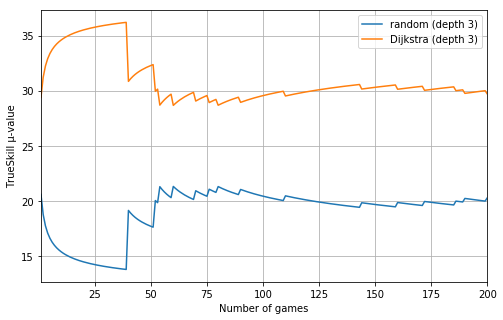

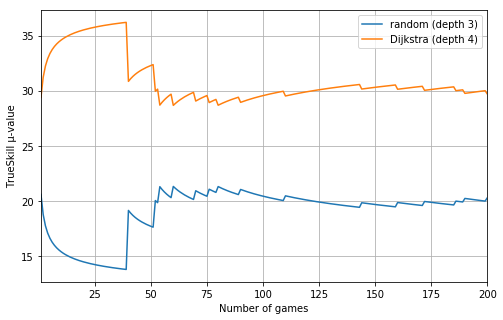

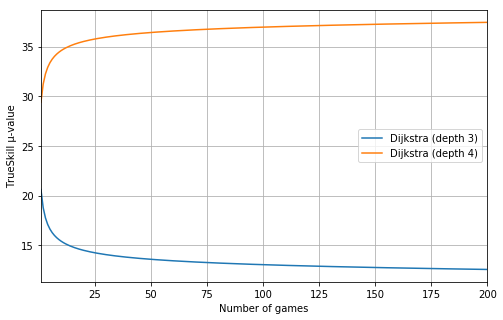

In [15]:
players = [{ 'depth': 3, 'eval': 'random' }, { 'depth': 3, 'eval': 'Dijkstra' }, { 'depth': 4, 'eval': 'Dijkstra' }]

if not os.path.exists('plots'): os.makedirs('plots')


player_permutations = []
for i in range(len(players)):
    for j in range(i + 1, len(players)):
        player_permutations.append((players[i], players[j]))

for i, (p1, p2) in enumerate(player_permutations):
    games = df[(df['p1_depth'] == p1['depth']) & (df['p1_eval'] == p1['eval']) & (df['p2_depth'] == p2['depth']) & (df['p2_eval'] == p2['eval'])]
    
    ax = games.plot(x='game_id', y=['r1_mu', 'r2_mu'], figsize=(8,5), grid=True)
    
    ax.set_xlabel("Number of games")
    ax.set_ylabel("TrueSkill μ-value")
    ax.legend([p1['eval'] + " (depth " + str(p1['depth']) + ")", p2['eval'] + " (depth " + str(p2['depth']) + ")"]);
    
    ax.get_figure().savefig('plots/' + filename + '_' + str(i) + '.pdf')